In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Import Decision Tree Classifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_excel('result_uma.xlsx')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,hopes,snr,kable,BER,opoznenie,bandwith,protokol,straty,class
0,2,32.768003,0,4.308369,1.792578,457.862620,0,0.000000,0
1,2,41.411371,0,292.226505,1.994106,2204.653993,1,18.076263,1
2,4,46.025630,0,75.786510,0.134042,2280.585376,1,75.461326,1
3,3,52.440110,0,14.301459,2.556367,1993.091686,0,0.000000,0
4,6,67.352808,1,24.073524,0.770134,1883.972531,1,33.455956,1


In [5]:
#initiation decision tree
#decision_tree_classifier = DecisionTreeClassifier(random_state=123, max_depth=3)
rf = LogisticRegression(random_state=123)

In [6]:
#clf = decision_tree_classifier.fit(df.drop('class',axis=1),df['class'])
clf = rf.fit(df.drop('class',axis=1),df['class'])

C:\Users\Szery\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
#from sklearn.tree import export_graphviz
#tree_structure = export_graphviz( 
# clf,
# out_file=None,
# feature_names=df.columns[:-1],
# class_names=['0','1','2'],
# filled=True,
#)
#print(tree_structure)

In [7]:
dfp = pd.read_excel('predict100.xlsx')
df_copy = dfp.copy()
df_pred = df_copy.drop(df_copy.columns[-1], axis=1)

df_pred.head()




,hopes,snr,kable,BER,opoznenie,bandwith,protokol,straty
0,4,61.352710,0,84.926639,0.869536,776.155976,1,12.519843
1,3,46.688936,1,61.448371,10.831340,1957.122962,1,17.894599
2,6,84.582402,1,465.831337,2.700141,3860.046967,0,0.000000
3,5,61.252672,1,36.910979,0.663554,2581.233799,0,0.000000
4,3,44.032496,1,13.803191,1.094436,750.398397,0,0.000000


In [8]:
dfp = pd.read_excel('predict100.xlsx')
df_copy = dfp.copy()
df_pred = df_copy.drop(df_copy.columns[-1], axis=1)

df_expect = dfp.iloc[:, -1]

predictions=clf.predict(df_pred)
expected_classes =df_expect.values
print(predictions)
print(expected_classes)

[1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 0 2 1 1 1 1 1 1 0 1 2 2 1 1 1 1 0 1 1 1 2 1
 2 1 0 1 0 1 1 1 1 1 1 1 1 2 1 0 0 2 1 2 1 1 2 2 1 0 1 1 0 2 1 1 1 2 0 1 2
 1 0 1 1 1 2 1 1 1 2 1 2 1 0 0 1 1 1 2 1 2 1 2 2 2 2 2 2 1 1 1 1 0 2 1 1 1
 1 2 1 1 1 0 2 1 2]
[1 1 2 0 0 1 2 1 1 1 2 1 1 1 1 0 2 1 0 1 1 0 1 0 1 1 2 0 0 1 1 1 2 1 0 1 2
 2 1 1 1 0 1 2 1 2 1 1 2 1 2 1 2 1 2 0 2 0 1 1 2 1 1 2 1 0 1 0 1 1 2 0 0 2
 1 0 0 1 1 1 2 1 2 2 1 1 1 1 0 2 2 1 1 2 1 1 2 1 1 2 2 2 2 1 1 1 0 2 1 1 2
 0 1 1 1 2 1 1 1 2]


In [9]:
accuracy = sum(predictions == expected_classes) / len(expected_classes) * 100
print("Accuracy:", accuracy)

Accuracy: 58.333333333333336


In [10]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(expected_classes, predictions)
print("Confusion matrix:")
print(confusion)

Confusion matrix:
[[ 8 13  0]
 [ 6 45 14]
 [ 1 16 17]]


In [11]:
from sklearn.metrics import classification_report
classification_report = classification_report(expected_classes, predictions)
print("Classification Report:")
print(classification_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.38      0.44        21
           1       0.61      0.69      0.65        65
           2       0.55      0.50      0.52        34

    accuracy                           0.58       120
   macro avg       0.56      0.52      0.54       120
weighted avg       0.58      0.58      0.58       120



In [12]:
from sklearn import metrics

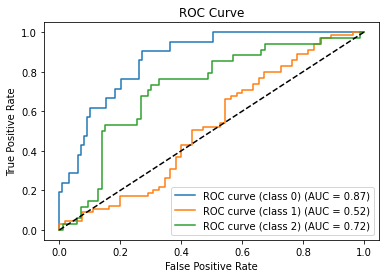

AUC-ROC Score (class 0): 0.87
AUC-ROC Score (class 1): 0.52
AUC-ROC Score (class 2): 0.72


In [13]:
from sklearn.preprocessing import label_binarize

# ro binary
binarized_expected_classes = label_binarize(expected_classes, classes=[0, 1, 2])

# prawdopodobieństwa klas
binarized_y_scores = clf._predict_proba_lr(df_pred)

#  ROC-krzywe i AUC-ROC dla każdej klasy
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(binarized_expected_classes.shape[1]):
    fpr[i], tpr[i], _ = metrics.roc_curve(binarized_expected_classes[:, i], binarized_y_scores[:, i])
    roc_auc[i] = metrics.roc_auc_score(binarized_expected_classes[:, i], binarized_y_scores[:, i])

# Wizualizacja  ROC-krzywej dla każdej klasy
plt.figure()
for i in range(binarized_expected_classes.shape[1]):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {0}) (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#  AUC-ROC dla każdej klasy 
for i in range(binarized_expected_classes.shape[1]):
    print("AUC-ROC Score (class {0}): {1:.2f}".format(i, roc_auc[i]))


In [14]:
from sklearn.inspection import permutation_importance


In [15]:
perm_importance = permutation_importance(clf, dfp.iloc[:, :-1], dfp.iloc[:, -1])
feature_importances = perm_importance
feature_names = df_pred.columns
df_imp = pd.DataFrame([feature_names,feature_importances['importances_mean']]).T.sort_values(1,ascending=False)

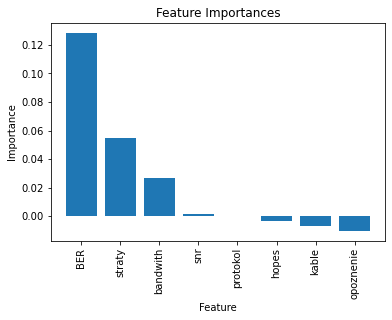

In [16]:
plt.bar(df_imp[0], df_imp[1])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()